# EDA With malnutrition recurrency variable

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns

In [ ]:
df = pd.read_parquet('DATA/join_sociodemo_tomasDPI_tagged.parquet')

In [ ]:
pd.options.display.max_columns = 100 
pd.options.display.max_rows = 100

In [ ]:
df

,Cod_clase,Ind_grupo_sisben_4,Ind_nivel_sisben_4,Tip_vivienda,Ind_tiene_energia,Ind_tiene_alcantarillado,Ind_tiene_gas,Ind_tiene_recoleccion,Ind_tiene_acueducto,Num_hogares_vivienda,Tip_ocupa_vivienda,Ind_tiene_cocina,Ind_tiene_nevera,Ind_tiene_lavadora,Ind_tiene_pc,Ind_tiene_internet,Num_personas_hogar,Sexo,Ind_discap_ninguna,Tip_seg_social,Ind_acudio_salud,Ind_fue_atendido_salud,Tip_cuidado_niños,Ind_recibe_comida,Ind_leer_escribir,Ind_estudia,privado_logroeduca,privado_analfabe,privado_Inasistencia,privado_Rezago,privado_primera_inf,privado_trabajo_inf,privado_desemplarga,privado_trabajoinfo,privado_asegura,privado_accesosalud,privado_agua,privado_excreta,privado_suelo,privado_pared,privado_hacina,Noprivaciones,IndicadorPobrezaMulti,ingresos_promP_imp,gasto_ppers_imp,gasto_alim_ppers_imp,porc_gasto_alim,union_temp,n_ninos,Tip_hijo,Jefat_fem,Tip_familia,Gene_Ingr,Nivel_padreUni,Nivel_madreUni,anno_encuesta,Uni_dias_agua,Ind_afec_eventonatural,num_afec_eventonatural,Edad_padres_mayor,Edad_padres_menor,ComparteCocina_Sanitario,Estrato,cod_mpio,cod_dpto,FechaNacimiento,IdBeneficiario,Id,desnutricion,recuperacion,reincidencia
0,1,A,5,2,1,1,1,1,1,2,1,1,0,0,0,0,3,0.0,1.0,3,1.0,1.0,2,1,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2.10,0,66666.0,240000.0,100000.0,41.0,0,2,3,1,4,1,8,4,2019,7.0,0,0,30,30,1,3,11001,11,2017-12-26,16571555,3,False,False,False
1,1,A,4,2,1,1,0,1,1,1,1,1,0,0,0,0,5,0.0,1.0,3,9.0,9.0,1,1,9,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3.60,0,120000.0,156000.0,56000.0,35.0,0,4,3,1,1,2,8,3,2019,7.0,0,0,30,30,1,2,11001,11,2015-09-29,15753361,10,False,False,False
2,1,A,4,2,1,1,0,1,1,1,1,1,0,0,0,0,5,0.0,1.0,3,9.0,9.0,9,9,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3.60,0,120000.0,156000.0,56000.0,35.0,0,4,3,1,1,2,8,3,2019,7.0,0,0,30,30,1,2,11001,11,2013-12-03,9899861,14,False,False,False
3,1,A,1,2,1,1,1,1,1,1,1,1,1,0,0,0,3,0.0,1.0,0,9.0,9.0,2,1,9,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,4.35,0,30000.0,326666.0,100000.0,30.0,0,1,2,1,6,1,3,3,2019,7.0,0,0,33,23,0,2,11001,11,2014-06-28,14146154,23,False,False,False
4,1,A,5,1,1,1,1,1,1,2,1,1,0,0,0,0,4,1.0,0.0,3,9.0,9.0,9,9,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,4.35,0,150000.0,247500.0,75000.0,30.0,0,2,3,0,6,3,2,2,2019,7.0,0,0,47,31,0,2,11001,11,2011-12-27,11313127,33,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990768,3,C,17,1,0,0,0,0,0,1,4,1,0,0,0,0,3,0.0,1.0,0,1.0,1.0,3,1,9,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,5.85,1,345666.0,236666.0,133333.0,56.0,0,1,2,0,4,4,2,2,2017,0.0,0,0,36,34,1,0,99524,99,2014-11-27,11419702,5945432,False,False,False
990769,3,C,30,2,1,0,0,0,0,1,2,1,0,0,0,0,4,1.0,1.0,3,9.0,9.0,1,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,700000.0,283750.0,70000.0,24.0,0,1,2,1,4,1,8,4,2019,0.0,1,1,30,30,1,1,99001,99,2016-07-18,15322643,5945442,False,False,False
990770,3,D,36,1,0,0,0,0,0,2,4,1,0,0,0,0,3,0.0,1.0,1,9.0,9.0,2,1,9,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,2.70,0,266666.0,356666.0,150000.0,42.0,0,1,2,0,6,4,6,5,2018,0.0,1,6,33,28,1,0,99624,99,2016-05-01,17388731,5945444,False,False,False
990771,3,D,51,1,1,0,0,0,0,1,3,1,0,0,0,0,3,1.0,1.0,3,9.0,9.0,1,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,400000.0,113333.0,100000.0,88.0,0,1,2,0,6,3,6,5,2019,0.0,0,0,27,23,0,1,99001,99,2015-09-24,13495606,5945448,False,False,False


# Balancing the Data

Given that the data is really imbalanced (2018 cases of recurrency and 988755 cases of not recurrency on malnutrition) it would be best, for a previous EDA analysis to balance the data by data reduction. 

We are going to do this whit down sampling our dataframe, only for nor recurrency data points. 

In [ ]:
from sklearn.utils import resample

In [ ]:
df_recurrency = df[df['reincidencia']==True]

In [ ]:
df_not_recurrency = df[df['reincidencia']==False]

In [ ]:
# Downsample majority class
df_not_recurrency_downsampled = resample(df_not_recurrency, 
                                 replace=False,    # sample without replacement
                                 n_samples=2018,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class

df_downsampled = pd.concat([df_not_recurrency_downsampled, df_recurrency])

In [ ]:
df_downsampled.head()

,Cod_clase,Ind_grupo_sisben_4,Ind_nivel_sisben_4,Tip_vivienda,Ind_tiene_energia,Ind_tiene_alcantarillado,Ind_tiene_gas,Ind_tiene_recoleccion,Ind_tiene_acueducto,Num_hogares_vivienda,Tip_ocupa_vivienda,Ind_tiene_cocina,Ind_tiene_nevera,Ind_tiene_lavadora,Ind_tiene_pc,Ind_tiene_internet,Num_personas_hogar,Sexo,Ind_discap_ninguna,Tip_seg_social,Ind_acudio_salud,Ind_fue_atendido_salud,Tip_cuidado_niños,Ind_recibe_comida,Ind_leer_escribir,Ind_estudia,privado_logroeduca,privado_analfabe,privado_Inasistencia,privado_Rezago,privado_primera_inf,privado_trabajo_inf,privado_desemplarga,privado_trabajoinfo,privado_asegura,privado_accesosalud,privado_agua,privado_excreta,privado_suelo,privado_pared,privado_hacina,Noprivaciones,IndicadorPobrezaMulti,ingresos_promP_imp,gasto_ppers_imp,gasto_alim_ppers_imp,porc_gasto_alim,union_temp,n_ninos,Tip_hijo,Jefat_fem,Tip_familia,Gene_Ingr,Nivel_padreUni,Nivel_madreUni,anno_encuesta,Uni_dias_agua,Ind_afec_eventonatural,num_afec_eventonatural,Edad_padres_mayor,Edad_padres_menor,ComparteCocina_Sanitario,Estrato,cod_mpio,cod_dpto,FechaNacimiento,IdBeneficiario,Id,desnutricion,recuperacion,reincidencia
332943,1,B,8,1,1,0,0,1,1,2,1,1,1,0,0,0,3,0.0,1.0,3,9.0,9.0,1,1,9,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,6.45,1,116666.0,100000.0,66666.0,66.0,0,1,2,0,6,3,2,3,2019,3.0,0,0,30,23,1,1,47030,47,2016-04-01,14226683,1979036,False,False,False
340884,1,C,24,1,1,0,1,1,1,3,4,1,1,0,0,0,4,0.0,1.0,1,9.0,9.0,2,1,9,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,3.45,0,242500.0,150000.0,150000.0,100.0,0,2,3,0,6,4,6,6,2019,7.0,0,0,36,31,0,1,47001,47,2015-07-05,14933492,2014932,False,False,False
601611,1,A,4,1,1,0,1,1,1,1,4,1,0,0,0,0,4,1.0,1.0,3,9.0,9.0,2,1,9,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,4.20,0,84250.0,155000.0,100000.0,64.0,0,2,3,0,6,3,3,3,2019,7.0,1,8,28,27,1,1,8078,8,2019-04-23,18245025,3698748,False,False,False
338971,1,B,10,1,1,1,1,1,1,4,1,1,0,1,0,0,3,1.0,1.0,3,9.0,9.0,9,9,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2.10,0,275372.0,33333.0,80000.0,0.0,0,1,2,0,6,3,3,4,2019,7.0,0,0,26,25,1,0,47189,47,2013-07-13,10401329,2006652,False,False,False
107911,1,D,32,1,1,1,1,1,1,1,3,1,1,1,1,1,8,0.0,1.0,1,1.0,1.0,5,1,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.25,0,440764.0,253375.0,75000.0,29.0,0,3,3,0,4,4,4,4,2019,7.0,0,0,43,20,0,2,11001,11,2019-03-09,18263195,653792,False,False,False


# Previous EDA

<AxesSubplot:xlabel='Ind_discap_ninguna', ylabel='count'>

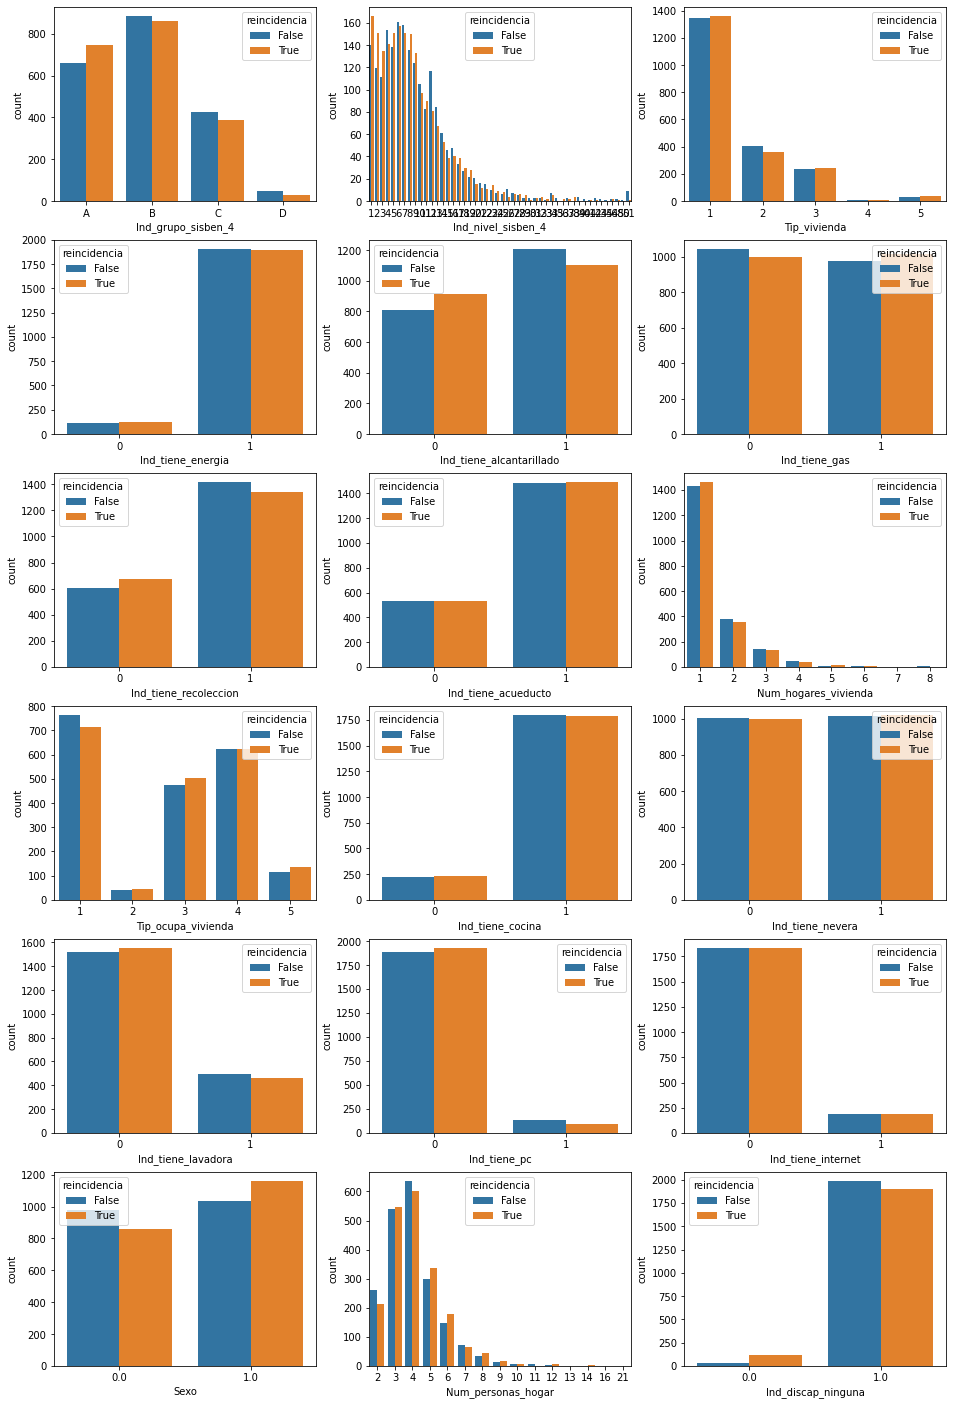

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(16, 25), sharey=False)

sns.countplot(x='Ind_grupo_sisben_4', hue = 'reincidencia', data = df_downsampled, ax = axes[0,0])

sns.countplot(x='Ind_nivel_sisben_4', hue = 'reincidencia', data = df_downsampled, ax = axes[0,1])

sns.countplot(x='Tip_vivienda', hue = 'reincidencia', data = df_downsampled, ax = axes[0,2])

sns.countplot(x='Ind_tiene_energia', hue = 'reincidencia', data = df_downsampled, ax = axes[1,0])

sns.countplot(x='Ind_tiene_alcantarillado', hue = 'reincidencia', data = df_downsampled, ax = axes[1,1])

sns.countplot(x='Ind_tiene_gas', hue = 'reincidencia', data = df_downsampled, ax = axes[1,2])

sns.countplot(x='Ind_tiene_recoleccion', hue = 'reincidencia', data = df_downsampled, ax = axes[2,0])

sns.countplot(x='Ind_tiene_acueducto', hue = 'reincidencia', data = df_downsampled, ax = axes[2,1])

sns.countplot(x='Num_hogares_vivienda', hue = 'reincidencia', data = df_downsampled, ax = axes[2,2])

sns.countplot(x='Tip_ocupa_vivienda', hue = 'reincidencia', data = df_downsampled, ax = axes[3,0])

sns.countplot(x='Ind_tiene_cocina', hue = 'reincidencia', data = df_downsampled, ax = axes[3,1])

sns.countplot(x='Ind_tiene_nevera', hue = 'reincidencia', data = df_downsampled, ax = axes[3,2])

sns.countplot(x='Ind_tiene_lavadora', hue = 'reincidencia', data = df_downsampled, ax = axes[4,0])

sns.countplot(x='Ind_tiene_pc', hue = 'reincidencia', data = df_downsampled, ax = axes[4,1])

sns.countplot(x='Ind_tiene_internet', hue = 'reincidencia', data = df_downsampled, ax = axes[4,2])

sns.countplot(x='Sexo', hue = 'reincidencia', data = df_downsampled, ax = axes[5,0])

sns.countplot(x='Num_personas_hogar', hue = 'reincidencia', data = df_downsampled, ax = axes[5,1])

sns.countplot(x='Ind_discap_ninguna', hue = 'reincidencia', data = df_downsampled, ax = axes[5,2])


**Tipo de Vivienda**

1.      Casa
2. Apartamento
3. Cuarto
4. Otro tipo de vivienda
5. Vivienda indígena

Let's plot the variable Ind_nivel_sisben_4 separately since it seems to show important information about the distribution of recurrency in the sisben level indicator. 

<AxesSubplot:xlabel='Ind_nivel_sisben_4', ylabel='count'>

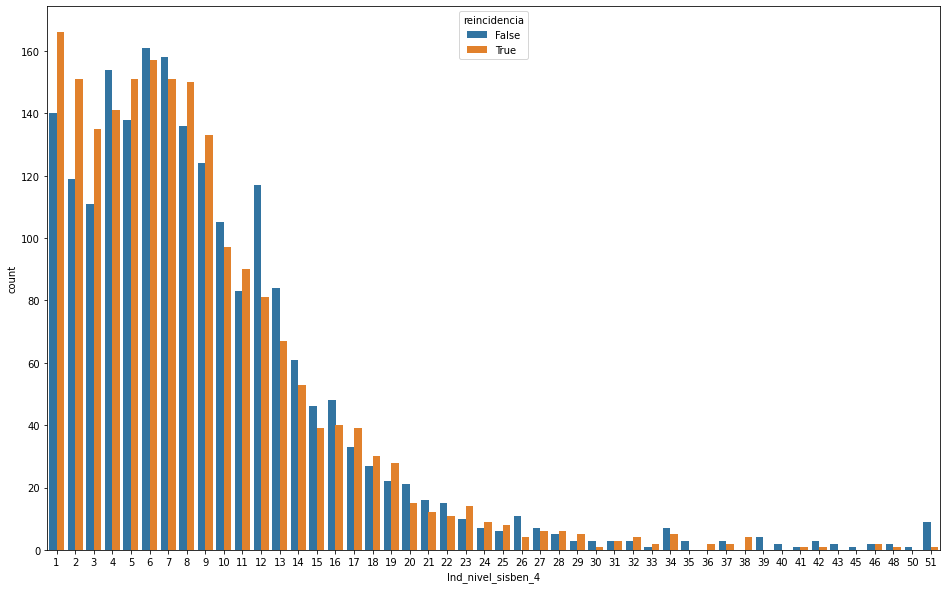

In [ ]:
fig, axes = plt.subplots(figsize=(16, 10))
sns.countplot(x='Ind_nivel_sisben_4', hue = 'reincidencia', data = df_downsampled)

How to interprete "Nivel Sisben"?:

"Nivel Sisben":


Group A (extreme Poverty)
Groub B (moderate poverty)
Group C (vulnerability)
Group D (Not poor nor vulnerable)

Let's check out both variables together:

In [ ]:
sisben_groups = df_downsampled[['Ind_grupo_sisben_4','Ind_nivel_sisben_4']]

In [ ]:
sisben_groups[sisben_groups['Ind_grupo_sisben_4'] == 'A']['Ind_nivel_sisben_4'].unique()

<IntegerArray>
[4, 3, 2, 5, 1]
Length: 5, dtype: UInt8

In [ ]:
sisben_groups[sisben_groups['Ind_grupo_sisben_4'] == 'B']['Ind_nivel_sisben_4'].unique()

<IntegerArray>
[8, 10, 9, 11, 6, 12, 7]
Length: 7, dtype: UInt8

In [ ]:
sisben_groups[sisben_groups['Ind_grupo_sisben_4'] == 'C']['Ind_nivel_sisben_4'].unique()

<IntegerArray>
[24, 27, 16, 14, 13, 21, 15, 26, 19, 22, 20, 17, 23, 18, 28, 29, 25, 30]
Length: 18, dtype: UInt8

In [ ]:
sisben_groups[sisben_groups['Ind_grupo_sisben_4'] == 'D']['Ind_nivel_sisben_4'].unique()

<IntegerArray>
[32, 37, 31, 51, 46, 39, 34, 43, 33, 48, 41, 35, 42, 45, 50, 40, 38, 36]
Length: 18, dtype: UInt8

So, it seems that every category has the same ammount of levels as Sisben classified, but they are not repeated, which means that they go from 1 to 51 instead overall instead of 1 to 5 for category A, 1 to 7 for category B, 1 to 18 to category C and 1 to 21 for category D. 

<AxesSubplot:xlabel='privado_agua', ylabel='count'>

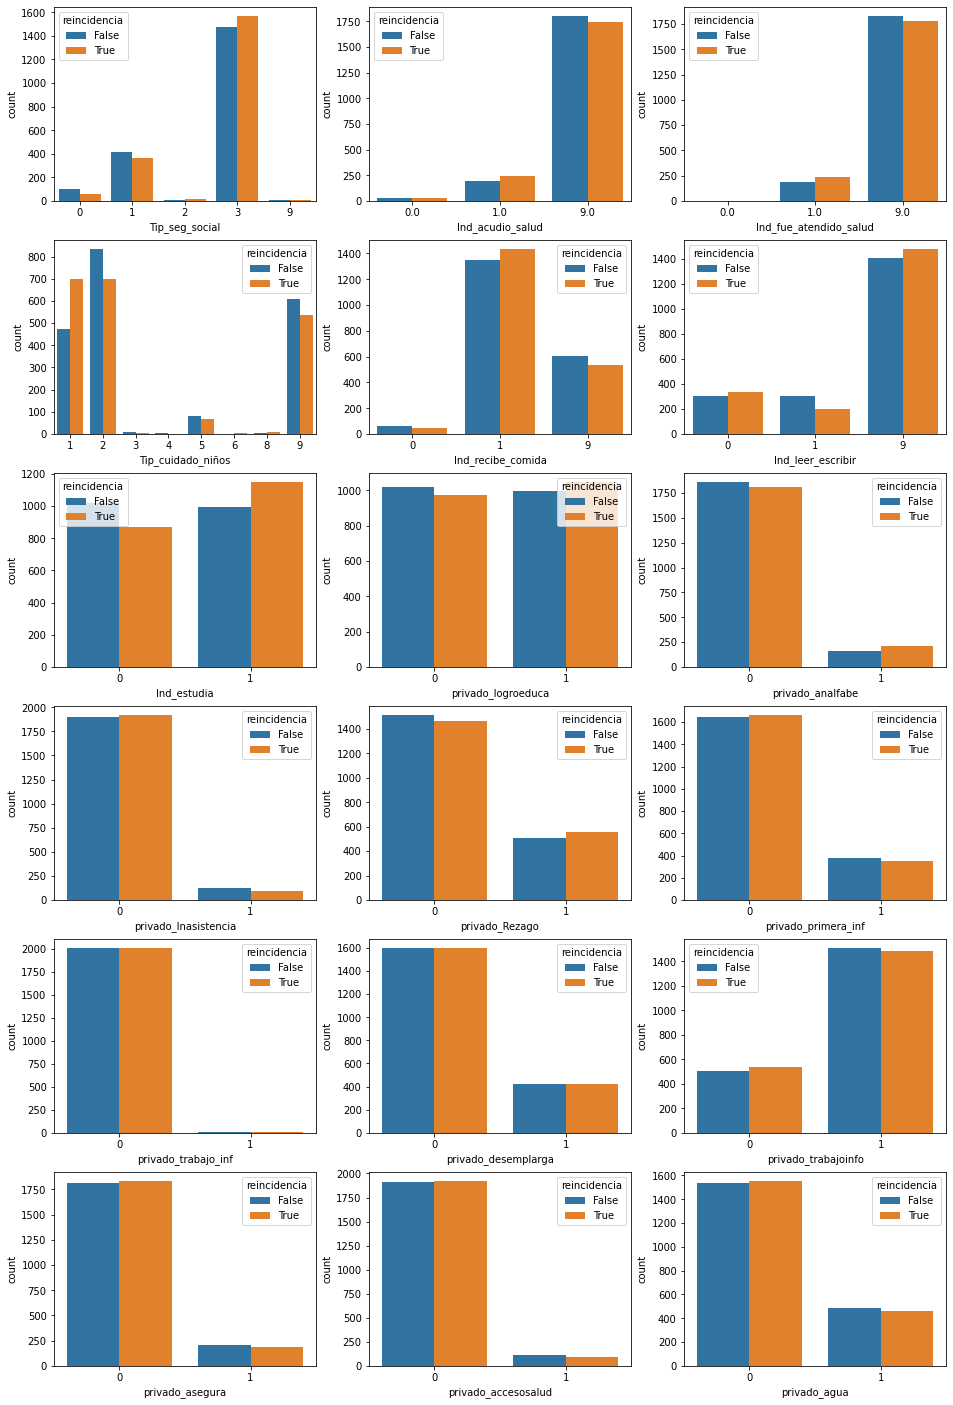

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(16, 25), sharey=False)

sns.countplot(x='Tip_seg_social', hue = 'reincidencia', data = df_downsampled, ax = axes[0,0])

sns.countplot(x='Ind_acudio_salud', hue = 'reincidencia', data = df_downsampled, ax = axes[0,1])

sns.countplot(x='Ind_fue_atendido_salud', hue = 'reincidencia', data = df_downsampled, ax = axes[0,2])

sns.countplot(x='Tip_cuidado_niños', hue = 'reincidencia', data = df_downsampled, ax = axes[1,0])

sns.countplot(x='Ind_recibe_comida', hue = 'reincidencia', data = df_downsampled, ax = axes[1,1])

sns.countplot(x='Ind_leer_escribir', hue = 'reincidencia', data = df_downsampled, ax = axes[1,2])

sns.countplot(x='Ind_estudia', hue = 'reincidencia', data = df_downsampled, ax = axes[2,0])

sns.countplot(x='privado_logroeduca', hue = 'reincidencia', data = df_downsampled, ax = axes[2,1])

sns.countplot(x='privado_analfabe', hue = 'reincidencia', data = df_downsampled, ax = axes[2,2])

sns.countplot(x='privado_Inasistencia', hue = 'reincidencia', data = df_downsampled, ax = axes[3,0])

sns.countplot(x='privado_Rezago', hue = 'reincidencia', data = df_downsampled, ax = axes[3,1])

sns.countplot(x='privado_primera_inf', hue = 'reincidencia', data = df_downsampled, ax = axes[3,2])

sns.countplot(x='privado_trabajo_inf', hue = 'reincidencia', data = df_downsampled, ax = axes[4,0])

sns.countplot(x='privado_desemplarga', hue = 'reincidencia', data = df_downsampled, ax = axes[4,1])

sns.countplot(x='privado_trabajoinfo', hue = 'reincidencia', data = df_downsampled, ax = axes[4,2])

sns.countplot(x='privado_asegura', hue = 'reincidencia', data = df_downsampled, ax = axes[5,0])

sns.countplot(x='privado_accesosalud', hue = 'reincidencia', data = df_downsampled, ax = axes[5,1])

sns.countplot(x='privado_agua', hue = 'reincidencia', data = df_downsampled, ax = axes[5,2])

**Tip_seg_social**

1. Contributivo
2. Especial (Fuerzas Armadas, Ecopetrol, universidades públicas, magisterio)
3. Subsidiado (EPS-S)
0. No sabe
9. Ninguna

**Tipo de cuidado de niños**

1. Asiste a un lugar comunitario, jardín o centro de desarrollo infantil o colegio
2. Con su padre o madre en la casa
3. Con su padre o madre en el trabajo
4. Con empleada o niñera en la casa
5. Al cuidado de un pariente de 18 años o más
6. Al cuidado de un pariente menor de 18 años
7. En casa solo
9. No aplica por flujo

In [ ]:
df.head()

,Cod_clase,Ind_grupo_sisben_4,Ind_nivel_sisben_4,Tip_vivienda,Ind_tiene_energia,Ind_tiene_alcantarillado,Ind_tiene_gas,Ind_tiene_recoleccion,Ind_tiene_acueducto,Num_hogares_vivienda,Tip_ocupa_vivienda,Ind_tiene_cocina,Ind_tiene_nevera,Ind_tiene_lavadora,Ind_tiene_pc,Ind_tiene_internet,Num_personas_hogar,Sexo,Ind_discap_ninguna,Tip_seg_social,Ind_acudio_salud,Ind_fue_atendido_salud,Tip_cuidado_niños,Ind_recibe_comida,Ind_leer_escribir,Ind_estudia,privado_logroeduca,privado_analfabe,privado_Inasistencia,privado_Rezago,privado_primera_inf,privado_trabajo_inf,privado_desemplarga,privado_trabajoinfo,privado_asegura,privado_accesosalud,privado_agua,privado_excreta,privado_suelo,privado_pared,privado_hacina,Noprivaciones,IndicadorPobrezaMulti,ingresos_promP_imp,gasto_ppers_imp,gasto_alim_ppers_imp,porc_gasto_alim,union_temp,n_ninos,Tip_hijo,Jefat_fem,Tip_familia,Gene_Ingr,Nivel_padreUni,Nivel_madreUni,anno_encuesta,Uni_dias_agua,Ind_afec_eventonatural,num_afec_eventonatural,Edad_padres_mayor,Edad_padres_menor,ComparteCocina_Sanitario,Estrato,cod_mpio,cod_dpto,FechaNacimiento,IdBeneficiario,Id,desnutricion,recuperacion,reincidencia
0,1,A,5,2,1,1,1,1,1,2,1,1,0,0,0,0,3,0.0,1.0,3,1.0,1.0,2,1,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2.10,0,66666.0,240000.0,100000.0,41.0,0,2,3,1,4,1,8,4,2019,7.0,0,0,30,30,1,3,11001,11,2017-12-26,16571555,3,False,False,False
1,1,A,4,2,1,1,0,1,1,1,1,1,0,0,0,0,5,0.0,1.0,3,9.0,9.0,1,1,9,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3.60,0,120000.0,156000.0,56000.0,35.0,0,4,3,1,1,2,8,3,2019,7.0,0,0,30,30,1,2,11001,11,2015-09-29,15753361,10,False,False,False
2,1,A,4,2,1,1,0,1,1,1,1,1,0,0,0,0,5,0.0,1.0,3,9.0,9.0,9,9,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3.60,0,120000.0,156000.0,56000.0,35.0,0,4,3,1,1,2,8,3,2019,7.0,0,0,30,30,1,2,11001,11,2013-12-03,9899861,14,False,False,False
3,1,A,1,2,1,1,1,1,1,1,1,1,1,0,0,0,3,0.0,1.0,0,9.0,9.0,2,1,9,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,4.35,0,30000.0,326666.0,100000.0,30.0,0,1,2,1,6,1,3,3,2019,7.0,0,0,33,23,0,2,11001,11,2014-06-28,14146154,23,False,False,False
4,1,A,5,1,1,1,1,1,1,2,1,1,0,0,0,0,4,1.0,0.0,3,9.0,9.0,9,9,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,4.35,0,150000.0,247500.0,75000.0,30.0,0,2,3,0,6,3,2,2,2019,7.0,0,0,47,31,0,2,11001,11,2011-12-27,11313127,33,False,False,False


<AxesSubplot:xlabel='Nivel_madreUni', ylabel='count'>

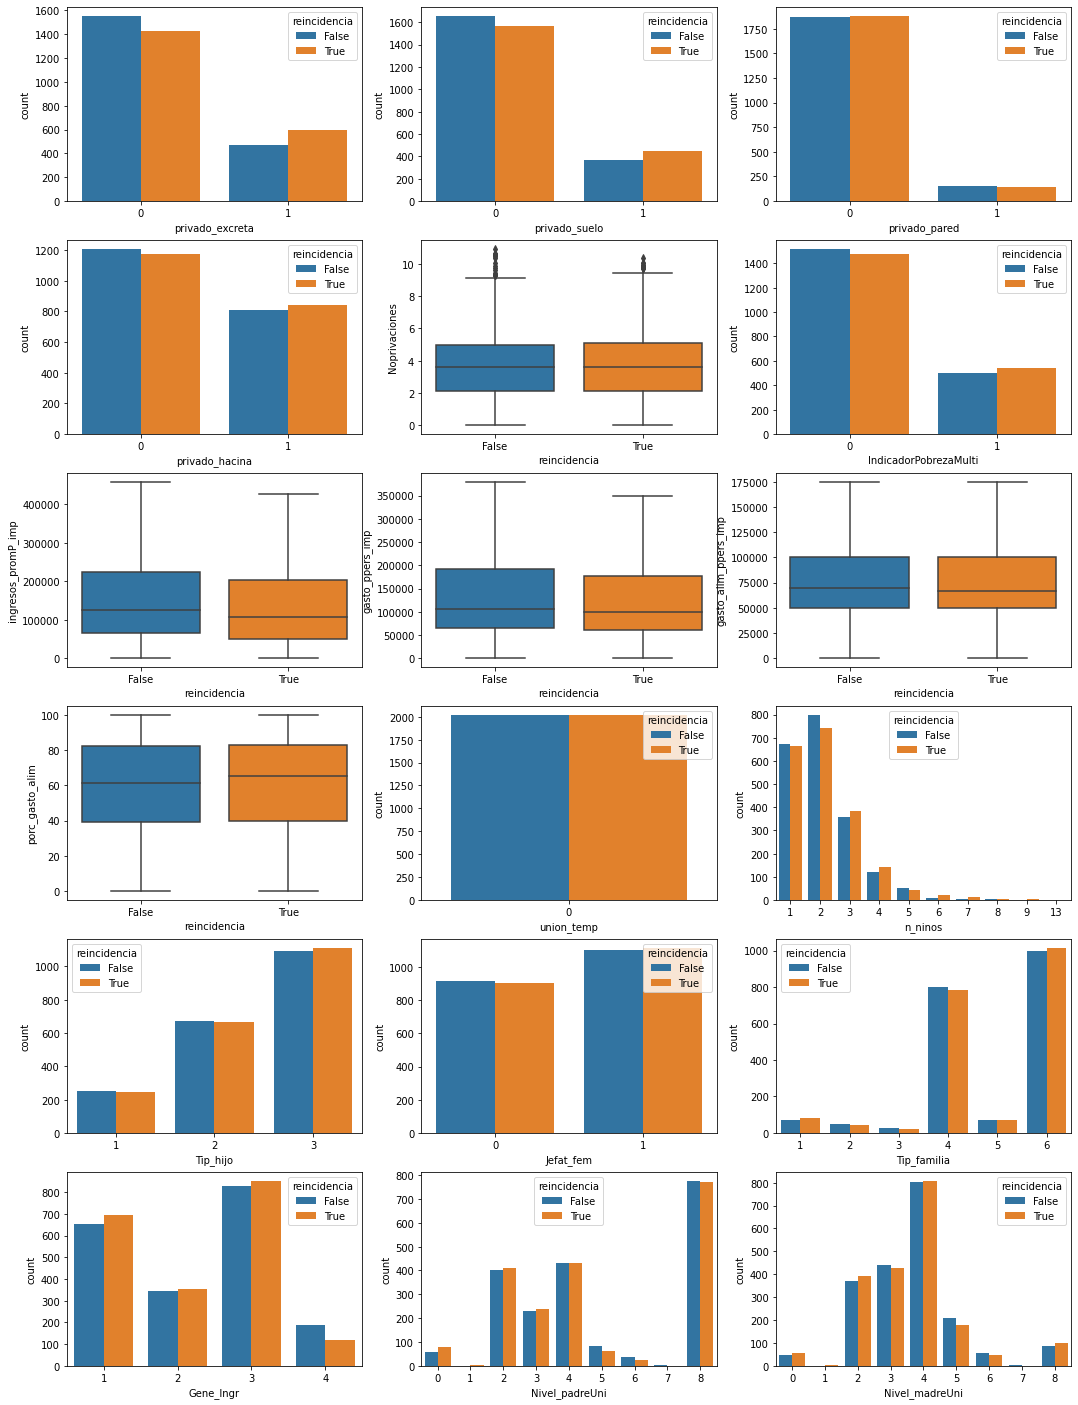

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(18, 25), sharey=False)

sns.countplot(x='privado_excreta', hue = 'reincidencia', data = df_downsampled, ax = axes[0,0])

sns.countplot(x='privado_suelo', hue = 'reincidencia', data = df_downsampled, ax = axes[0,1])

sns.countplot(x='privado_pared', hue = 'reincidencia', data = df_downsampled, ax = axes[0,2])

sns.countplot(x='privado_hacina', hue = 'reincidencia', data = df_downsampled, ax = axes[1,0])

sns.boxplot(y='Noprivaciones', x = 'reincidencia', data = df_downsampled, ax = axes[1,1])

sns.countplot(x='IndicadorPobrezaMulti', hue = 'reincidencia', data = df_downsampled, ax = axes[1,2])

sns.boxplot(y='ingresos_promP_imp', x = 'reincidencia', data = df_downsampled, showfliers = False, ax = axes[2,0])

sns.boxplot(y='gasto_ppers_imp', x = 'reincidencia', data = df_downsampled, ax = axes[2,1], showfliers = False)

sns.boxplot(y='gasto_alim_ppers_imp', x = 'reincidencia', data = df_downsampled, ax = axes[2,2], showfliers = False)

sns.boxplot(y='porc_gasto_alim', x = 'reincidencia', data = df_downsampled, ax = axes[3,0])

sns.countplot(x='union_temp', hue = 'reincidencia', data = df_downsampled, ax = axes[3,1])

sns.countplot(x='n_ninos', hue = 'reincidencia', data = df_downsampled, ax = axes[3,2])

sns.countplot(x='Tip_hijo', hue = 'reincidencia', data = df_downsampled, ax = axes[4,0])

sns.countplot(x='Jefat_fem', hue = 'reincidencia', data = df_downsampled, ax = axes[4,1])

sns.countplot(x='Tip_familia', hue = 'reincidencia', data = df_downsampled, ax = axes[4,2])

sns.countplot(x='Gene_Ingr', hue = 'reincidencia', data = df_downsampled, ax = axes[5,0])

sns.countplot(x='Nivel_padreUni', hue = 'reincidencia', data = df_downsampled, ax = axes[5,1])

sns.countplot(x='Nivel_madreUni', hue = 'reincidencia', data = df_downsampled, ax = axes[5,2])

**Tipo de Hijo**

1. Mayor
2. Único
3. Otro

**Tipo de Familia**

1. Sin madre y sin padre
2. Solo madre+conyugue
3.  Solo padre+conyugue
4.  Solo madre
5. Solo padre
6. Con madre y con padre

**Genero de los ingresos**

1. Solo figura paterna
2. solo figura materna
3. ninguno
4. Ambos

**Nivel Educativo Padre/Madre**

0. ninguno
1. preescolar
2. básica primaria
3. Básica secundaria (6 a 9)
4. Media (10 a 13)
5. Tecnológica o técnico
6. universitario
7. postgrado
9. no aplica por flujo

Let's do a deep analysis of the variables of incomes and spents.  

<AxesSubplot:xlabel='porc_gasto_alim', ylabel='Count'>

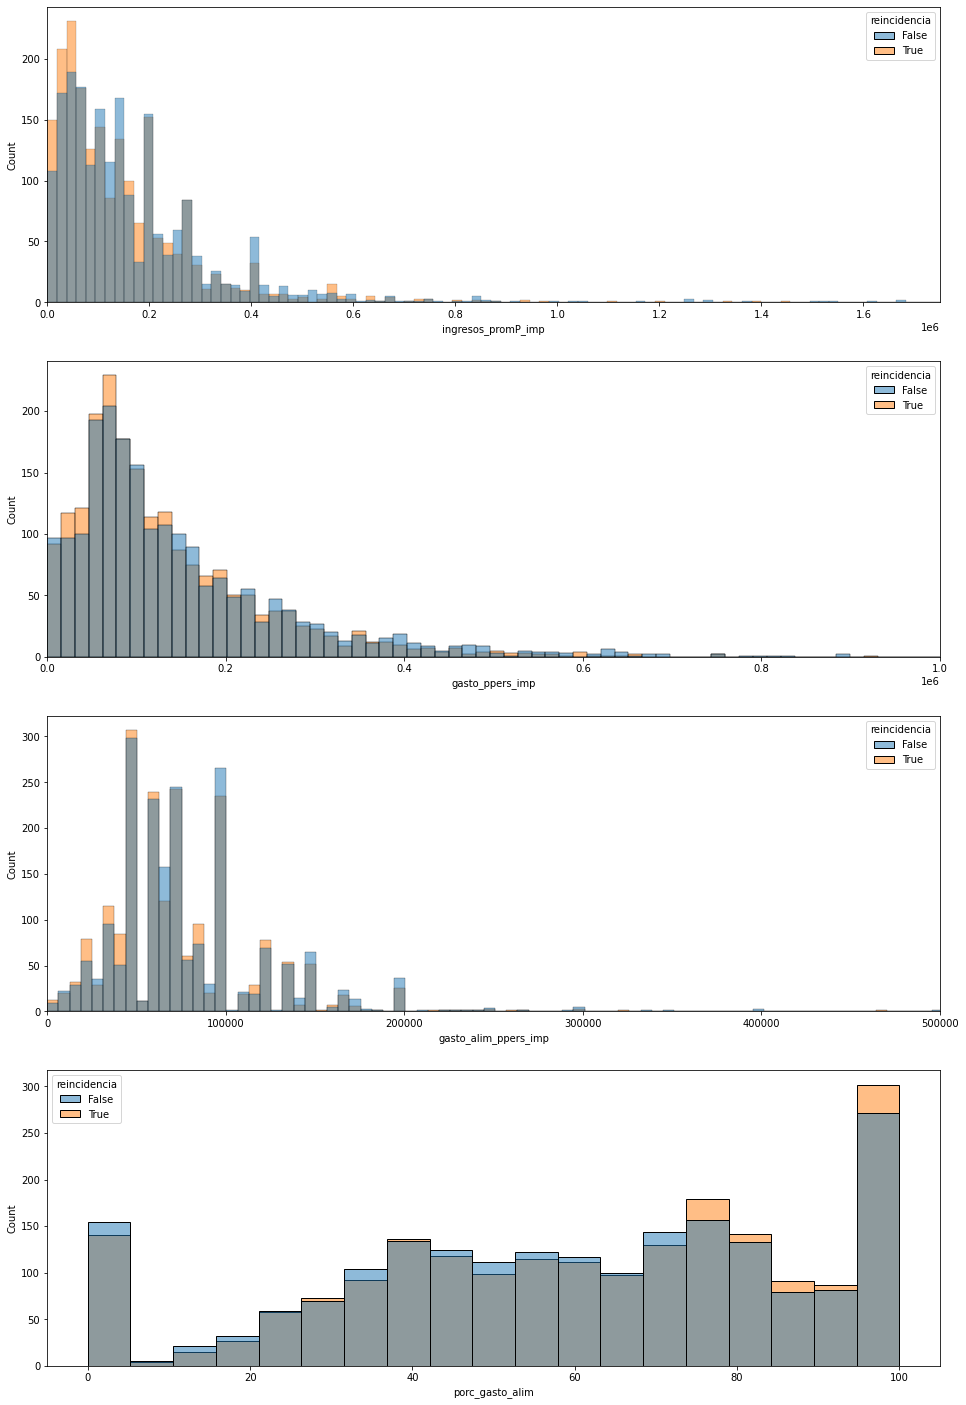

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(16, 25), sharey=False)
sns.histplot(x='ingresos_promP_imp', hue = 'reincidencia', data = df_downsampled,ax = axes[0]).set(xlim=(0, 1750000))
sns.histplot(x='gasto_ppers_imp', hue = 'reincidencia', data = df_downsampled,ax = axes[1]).set(xlim=(0, 1000000))
sns.histplot(x='gasto_alim_ppers_imp', hue = 'reincidencia', data = df_downsampled,ax = axes[2]).set(xlim=(0, 500000))
sns.histplot(x='porc_gasto_alim', hue = 'reincidencia', data = df_downsampled,ax = axes[3])



In [ ]:
df_downsampled

,Cod_clase,Ind_grupo_sisben_4,Ind_nivel_sisben_4,Tip_vivienda,Ind_tiene_energia,Ind_tiene_alcantarillado,Ind_tiene_gas,Ind_tiene_recoleccion,Ind_tiene_acueducto,Num_hogares_vivienda,Tip_ocupa_vivienda,Ind_tiene_cocina,Ind_tiene_nevera,Ind_tiene_lavadora,Ind_tiene_pc,Ind_tiene_internet,Num_personas_hogar,Sexo,Ind_discap_ninguna,Tip_seg_social,Ind_acudio_salud,Ind_fue_atendido_salud,Tip_cuidado_niños,Ind_recibe_comida,Ind_leer_escribir,Ind_estudia,privado_logroeduca,privado_analfabe,privado_Inasistencia,privado_Rezago,privado_primera_inf,privado_trabajo_inf,privado_desemplarga,privado_trabajoinfo,privado_asegura,privado_accesosalud,privado_agua,privado_excreta,privado_suelo,privado_pared,privado_hacina,Noprivaciones,IndicadorPobrezaMulti,ingresos_promP_imp,gasto_ppers_imp,gasto_alim_ppers_imp,porc_gasto_alim,union_temp,n_ninos,Tip_hijo,Jefat_fem,Tip_familia,Gene_Ingr,Nivel_padreUni,Nivel_madreUni,anno_encuesta,Uni_dias_agua,Ind_afec_eventonatural,num_afec_eventonatural,Edad_padres_mayor,Edad_padres_menor,ComparteCocina_Sanitario,Estrato,cod_mpio,cod_dpto,FechaNacimiento,IdBeneficiario,Id,desnutricion,recuperacion,reincidencia
332943,1,B,8,1,1,0,0,1,1,2,1,1,1,0,0,0,3,0.0,1.0,3,9.0,9.0,1,1,9,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,6.45,1,116666.0,100000.0,66666.0,66.0,0,1,2,0,6,3,2,3,2019,3.0,0,0,30,23,1,1,47030,47,2016-04-01,14226683,1979036,False,False,False
340884,1,C,24,1,1,0,1,1,1,3,4,1,1,0,0,0,4,0.0,1.0,1,9.0,9.0,2,1,9,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,3.45,0,242500.0,150000.0,150000.0,100.0,0,2,3,0,6,4,6,6,2019,7.0,0,0,36,31,0,1,47001,47,2015-07-05,14933492,2014932,False,False,False
601611,1,A,4,1,1,0,1,1,1,1,4,1,0,0,0,0,4,1.0,1.0,3,9.0,9.0,2,1,9,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,4.20,0,84250.0,155000.0,100000.0,64.0,0,2,3,0,6,3,3,3,2019,7.0,1,8,28,27,1,1,8078,8,2019-04-23,18245025,3698748,False,False,False
338971,1,B,10,1,1,1,1,1,1,4,1,1,0,1,0,0,3,1.0,1.0,3,9.0,9.0,9,9,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2.10,0,275372.0,33333.0,80000.0,0.0,0,1,2,0,6,3,3,4,2019,7.0,0,0,26,25,1,0,47189,47,2013-07-13,10401329,2006652,False,False,False
107911,1,D,32,1,1,1,1,1,1,1,3,1,1,1,1,1,8,0.0,1.0,1,1.0,1.0,5,1,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.25,0,440764.0,253375.0,75000.0,29.0,0,3,3,0,4,4,4,4,2019,7.0,0,0,43,20,0,2,11001,11,2019-03-09,18263195,653792,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982488,3,A,1,1,0,0,0,0,0,1,3,1,0,0,0,0,7,1.0,1.0,0,9.0,9.0,2,0,9,0,1,0,1,1,1,0,1,1,0,0,1,1,1,0,1,9.15,1,30000.0,62142.0,42857.0,68.0,0,6,3,1,4,1,8,3,2019,0.0,0,0,15,15,0,0,81794,81,2018-11-27,17702605,5889512,True,True,True
982897,3,A,2,1,1,0,0,0,0,1,4,1,1,1,0,0,4,0.0,1.0,3,9.0,9.0,2,1,9,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,6.45,1,3752.0,65000.0,50000.0,76.0,0,2,3,0,6,1,2,2,2018,0.0,1,1,34,29,1,1,81300,81,2018-01-17,16506098,5892972,True,True,True
989080,3,B,7,1,0,0,0,0,0,1,3,1,0,0,0,0,3,1.0,1.0,3,9.0,9.0,1,1,9,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3.60,0,66666.0,101250.0,70000.0,69.0,0,1,2,1,4,1,8,2,2018,0.0,0,0,46,46,1,0,86568,86,2015-10-12,13367677,5935429,True,True,True
989520,3,B,11,3,1,0,0,0,0,1,5,0,1,0,0,0,3,1.0,1.0,3,9.0,9.0,1,1,9,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2.10,0,116666.0,73333.0,66666.0,90.0,0,2,1,1,4,2,8,5,2019,0.0,0,0,32,32,0,1,86001,86,2015-08-15,13302444,5937742,True,True,True


<AxesSubplot:xlabel='cod_dpto', ylabel='count'>

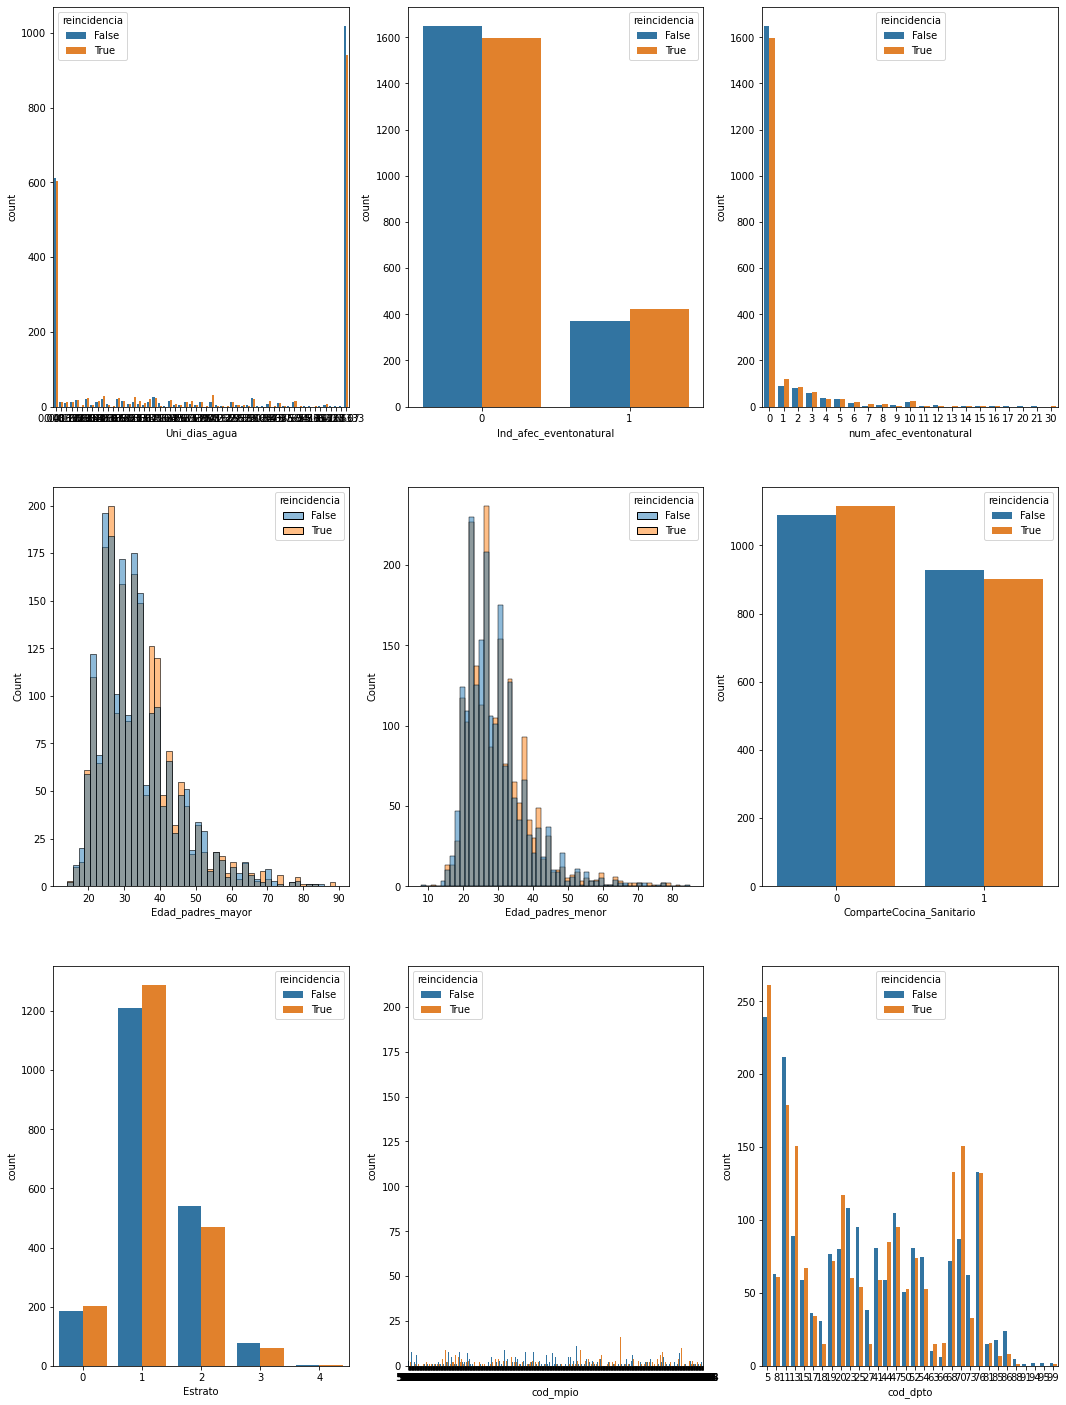

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 25), sharey=False)

sns.countplot(x='Uni_dias_agua', hue = 'reincidencia', data = df_downsampled, ax = axes[0,0])

sns.countplot(x='Ind_afec_eventonatural', hue = 'reincidencia', data = df_downsampled, ax = axes[0,1])

sns.countplot(x='num_afec_eventonatural', hue = 'reincidencia', data = df_downsampled, ax = axes[0,2])

sns.histplot(x='Edad_padres_mayor', hue = 'reincidencia', data = df_downsampled, ax = axes[1,0])

sns.histplot(x='Edad_padres_menor', hue = 'reincidencia', data = df_downsampled, ax = axes[1,1])

sns.countplot(x='ComparteCocina_Sanitario', hue = 'reincidencia', data = df_downsampled, ax = axes[1,2])

sns.countplot(x='Estrato', hue = 'reincidencia', data = df_downsampled, ax = axes[2,0])

sns.countplot(x='cod_mpio', hue = 'reincidencia', data = df_downsampled, ax = axes[2,1])

sns.countplot(x='cod_dpto', hue = 'reincidencia', data = df_downsampled, ax = axes[2,2])


Let's take a better look to the following variables: Uni_dias_agua, num_afec_eventonatural, cod_mpio and cod_dpto

**Cities**

In [ ]:
top_10_cities_true_cases = df_downsampled[df_downsampled['reincidencia']==True].groupby('cod_mpio').count().sort_values(by='Cod_clase', 
                                                                                             ascending = False).head(20).index

In [ ]:
top_10_cities_true_cases

Index([11001,  5001, 76001, 70001, 68001, 20001, 44847, 41001, 68575, 13442,
       13430, 54001, 44001, 50001, 70708, 70713, 20011,  5579, 68081,  8758],
      dtype='object', name='cod_mpio')

In [ ]:
df_top10_cities_True_cases = df_downsampled[df_downsampled['cod_mpio'].isin(top_10_cities_true_cases)]

<AxesSubplot:xlabel='cod_mpio', ylabel='count'>

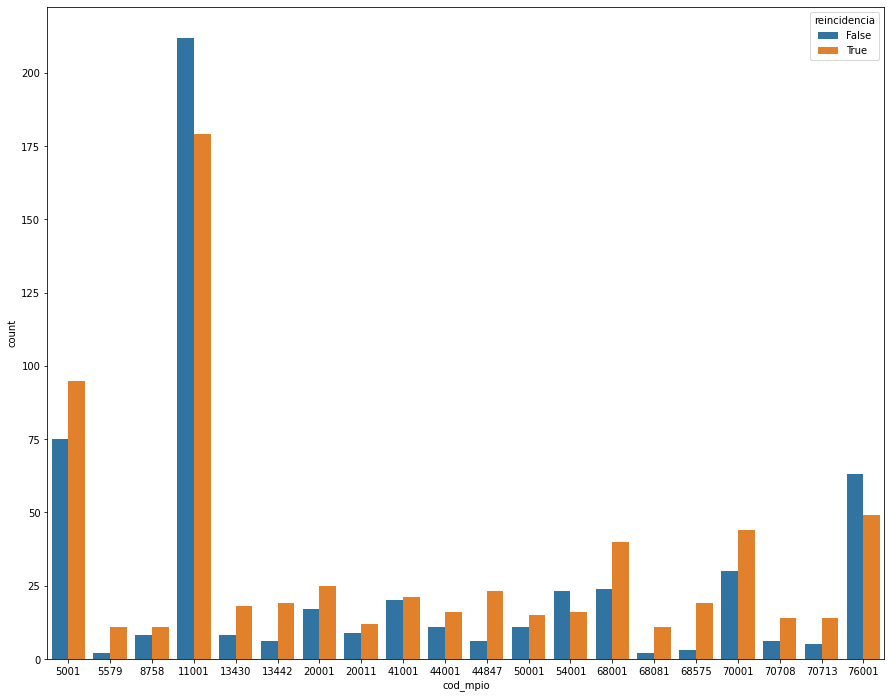

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12))
sns.countplot(x = 'cod_mpio', hue = 'reincidencia', data = df_top10_cities_True_cases)

Now let's look only for those cities where we have more cases of recurrency than cases where not.

In [ ]:
true_cases = df_downsampled[df_downsampled['reincidencia']==True]['cod_mpio'].value_counts().reset_index()
true_cases2 = true_cases.rename(columns={'cod_mpio': 'True'})

In [ ]:
false_cases = df_downsampled[df_downsampled['reincidencia']==False]['cod_mpio'].value_counts().reset_index()
false_cases2 = false_cases.rename(columns={'cod_mpio': 'False'})

In [ ]:
merge = pd.merge(left = true_cases2, right = false_cases2, on = 'index')

In [ ]:
merge

,index,True,False
0,11001,179,212
1,5001,95,75
2,76001,49,63
3,70001,44,30
4,68001,40,24
...,...,...,...
392,41807,1,3
393,5667,1,1
394,5809,1,1
395,19355,1,4


In [ ]:
merge['Proportion'] = merge['True']/merge['False']

In [ ]:
top20_cities_high_true_relation = merge[merge['Proportion'] > 1].sort_values(by = 'Proportion', 
                                                                           ascending=False).head(20)['index']

In [ ]:
df_top20_cities_higherProportion_cases = df_downsampled[df_downsampled['cod_mpio'].isin(top20_cities_high_true_relation)]



<AxesSubplot:xlabel='cod_mpio', ylabel='count'>

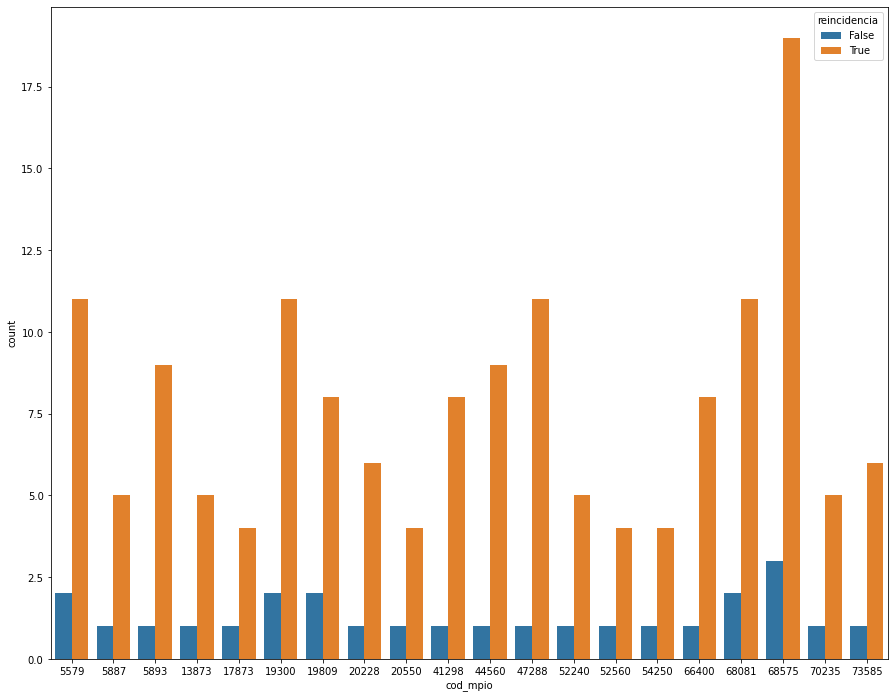

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12))
sns.countplot(x = 'cod_mpio', hue = 'reincidencia', data = df_top20_cities_higherProportion_cases)

In [ ]:
# The df_test dataframe is done at the end of the notebook
df_mpio_dpto = df_test.copy()
df_mpio_dpto['cod_mpio'] = df_mpio_dpto['cod_mpio'].astype(int)
df_mpio_dpto['cod_dpto'] = df_mpio_dpto['cod_dpto'].astype(int)

In [ ]:
df_top20_cities_higherProportion_cases2 = df_mpio_dpto[df_mpio_dpto['cod_mpio'].isin(top20_cities_high_true_relation)]

<AxesSubplot:xlabel='count', ylabel='nom_mpio'>

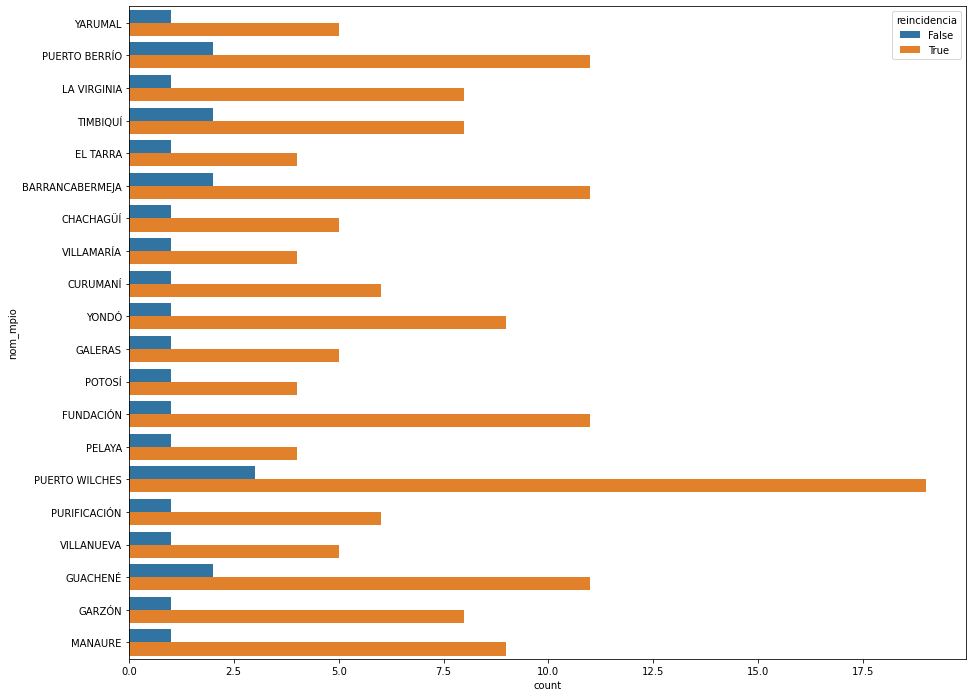

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12))
sns.countplot(y = 'nom_mpio', hue = 'reincidencia', data = df_top20_cities_higherProportion_cases2, orient='h')

City with higher proportion = Puerto Wilches, Santander

**Departments**

<AxesSubplot:xlabel='cod_dpto', ylabel='count'>

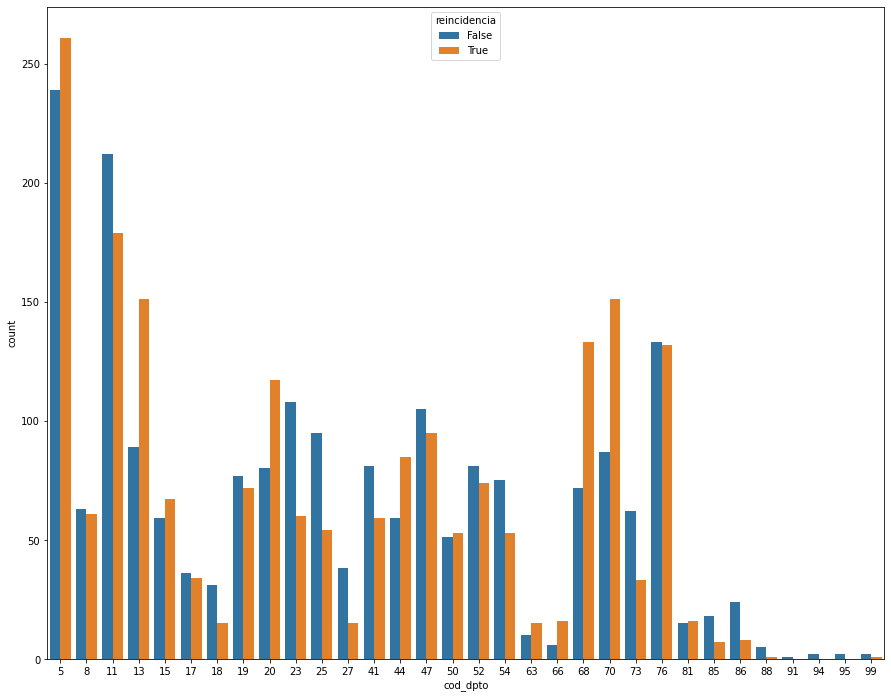

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12))
sns.countplot(x='cod_dpto', hue = 'reincidencia', data = df_downsampled)

<AxesSubplot:xlabel='count', ylabel='nom_dpto'>

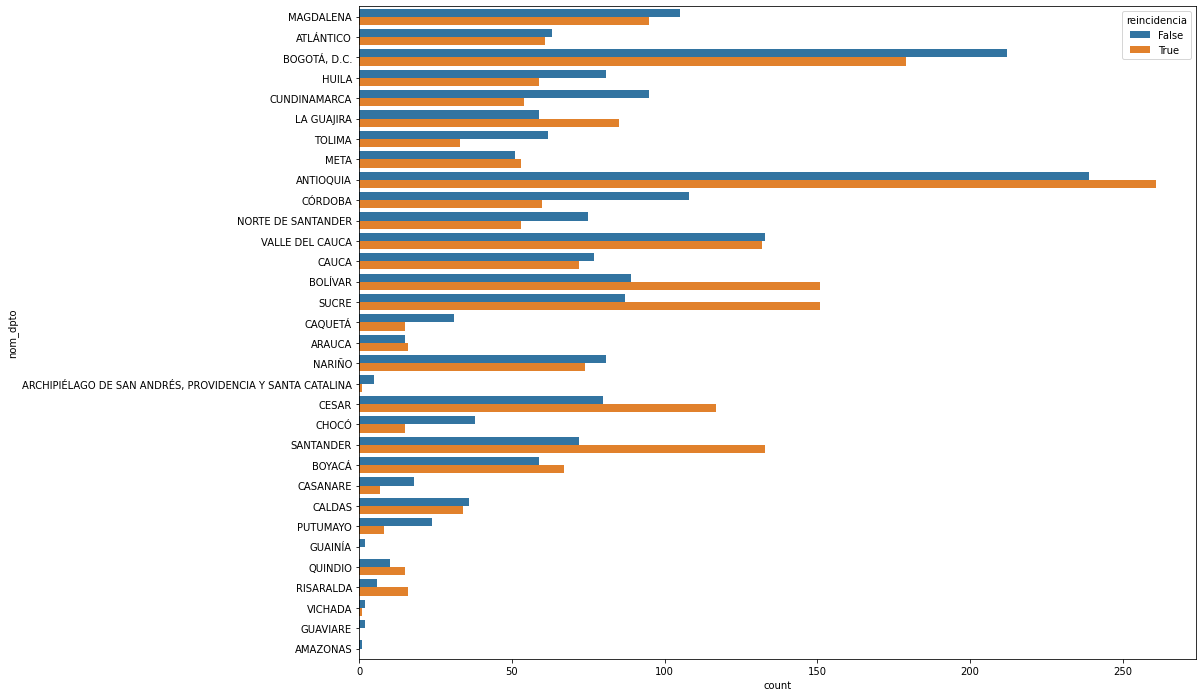

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12))
sns.countplot(y='nom_dpto', hue = 'reincidencia', data = df_mpio_dpto, orient='h')

More True cases: Antioquia

Let's look for the departments with higher proportion of True cases

In [ ]:
true_cases_dpt = df_downsampled[df_downsampled['reincidencia']==True]['cod_dpto'].value_counts().reset_index()
true_cases_dpt2 = true_cases_dpt.rename(columns={'cod_dpto': 'True'})
false_cases_dpt = df_downsampled[df_downsampled['reincidencia']==False]['cod_dpto'].value_counts().reset_index()
false_cases_dpt2 = false_cases_dpt.rename(columns={'cod_dpto': 'False'})
merge_dpt = pd.merge(left = true_cases_dpt2, right = false_cases_dpt2, on = 'index')

In [ ]:
merge_dpt['Proportion'] = merge_dpt['True']/merge_dpt['False']

In [ ]:
merge_dpt.sort_values(by = 'Proportion', ascending = False)

,index,True,False,Proportion
20,66,16,6,2.666667
4,68,133,72,1.847222
2,70,151,87,1.735632
3,13,151,89,1.696629
22,63,15,10,1.5
6,20,117,80,1.4625
8,44,85,59,1.440678
11,15,67,59,1.135593
0,5,261,239,1.09205
21,81,16,15,1.066667


Departments with higher proportion of True Cases vs False cases of recurrency: 1. Risaralda, 2. Santander, 3. Sucre, 4. Bolivar, 5. Quindio, 6. Cesar, 7. Guajira.

**Days of water**

<AxesSubplot:xlabel='count', ylabel='Uni_dias_agua'>

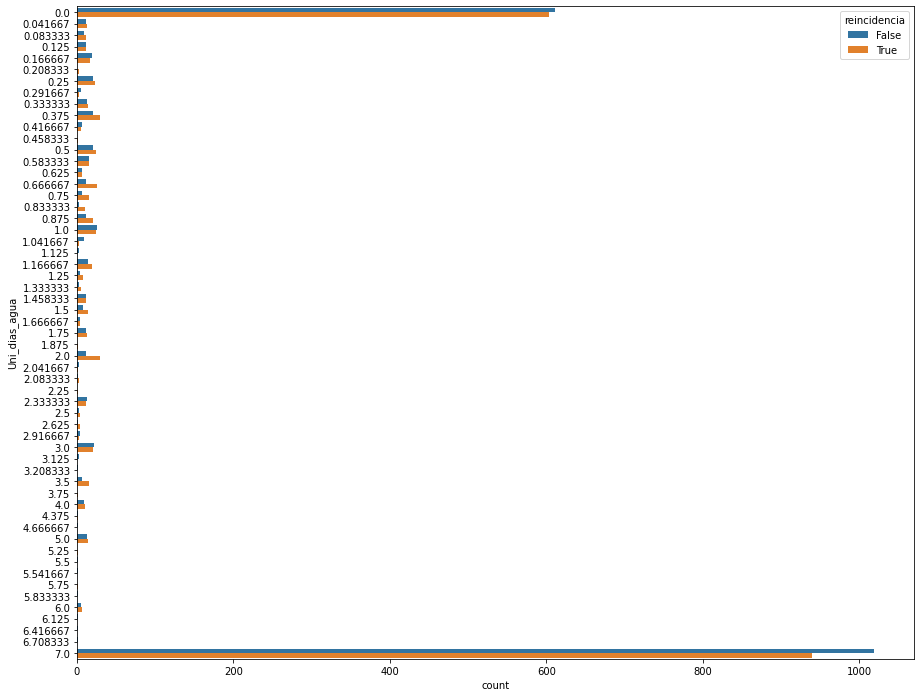

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12))
sns.countplot(y='Uni_dias_agua', hue = 'reincidencia', data = df_downsampled, orient='h')

Let's create a category for the range of days the beneficiary has water

In [ ]:
def water_category(days):
    if days <=1:
        return('less than one day')
    elif days<=2:
        return('1-2 days')
    elif days <=3:
        return('2-3 days')
    elif days <=4:
        return('3-4 days')
    elif days <=5:
        return('4-5 days')
    elif days <= 6:
        return('5-6 days')
    elif days <=7:
        return('6-7 days')

In [ ]:
df_downsampled['dias_con_agua'] = df_downsampled['Uni_dias_agua'].apply(water_category)

<AxesSubplot:xlabel='count', ylabel='dias_con_agua'>

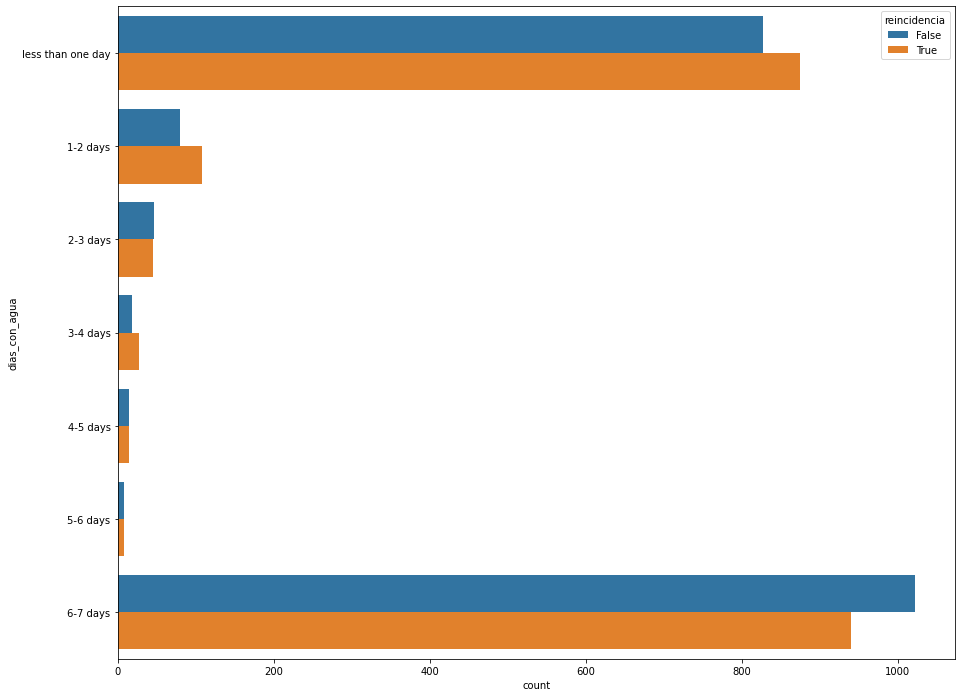

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12))
sns.countplot(y='dias_con_agua', hue = 'reincidencia', data = df_downsampled, orient='h',
             order=('less than one day', '1-2 days', '2-3 days', '3-4 days', '4-5 days', '5-6 days', '6-7 days'))

**number of natural events that affected the home**

<AxesSubplot:xlabel='num_afec_eventonatural', ylabel='count'>

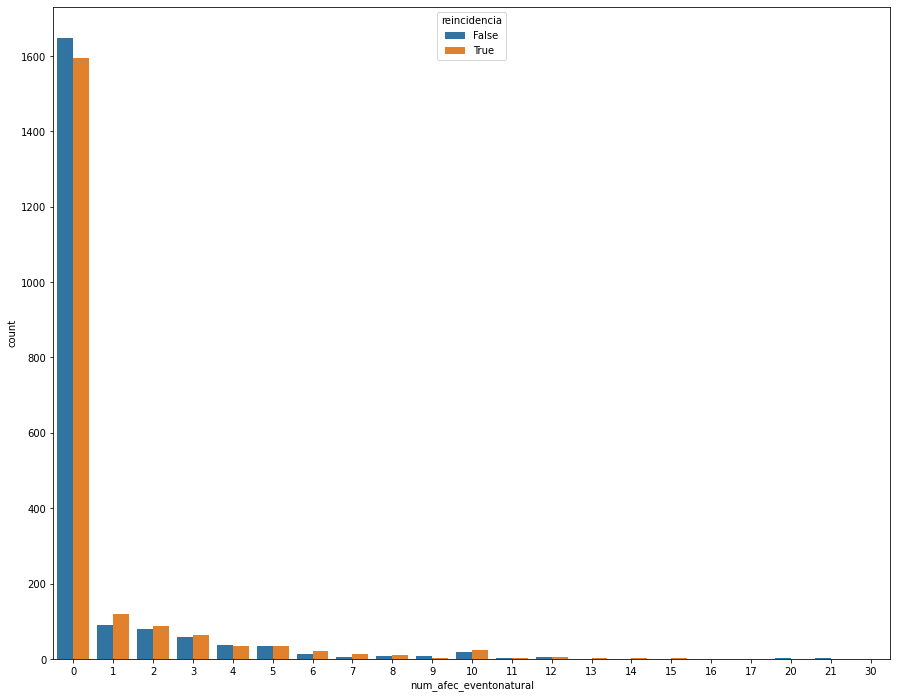

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12))
sns.countplot(x='num_afec_eventonatural', hue = 'reincidencia', data = df_downsampled)

**código Clase**

1. Cabecera
2. Centro poblado
3. Rural disperso

<AxesSubplot:xlabel='Cod_clase', ylabel='count'>

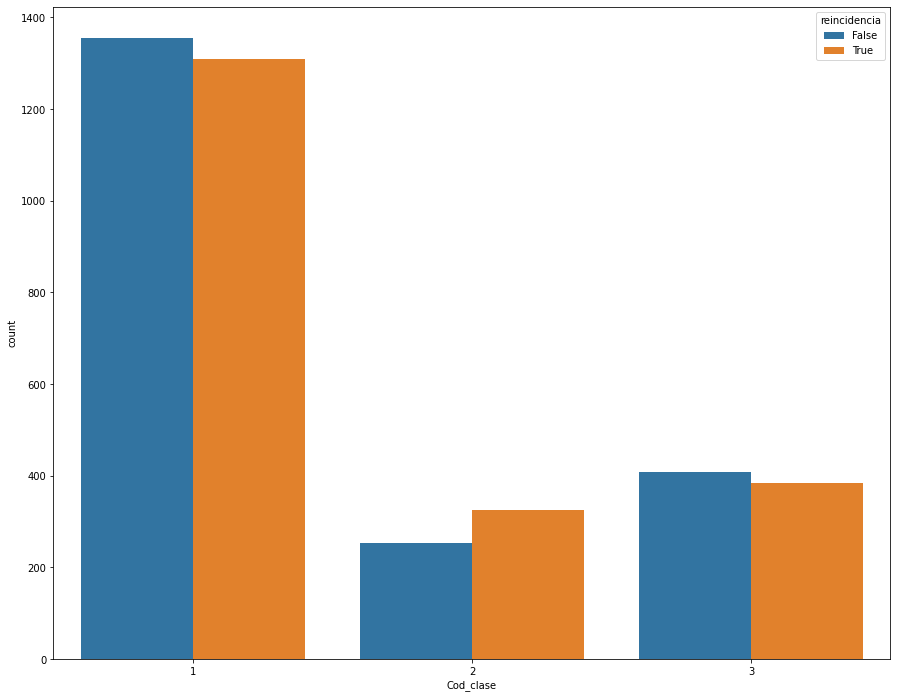

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12))
sns.countplot(x='Cod_clase', hue = 'reincidencia', data = df_downsampled)